In [1]:
import pandas as pd
df = pd.read_pickle("block4_1_concat.pkl")
df1 = pd.read_pickle("block4_4_concat.pkl")

In [2]:
df = df[["lat","lon","speed","lon_acc","lat_acc","type","avg_speed","bearing","edge_progress","dir","edge_progress_intervals","vehicle_density","avg_surr_speed","xtrack_dist","nearest_edge_start_node","nearest_edge_end_node"]]
df1 = df1[["lat","lon","speed","lon_acc","lat_acc","type","avg_speed","bearing","edge_progress","dir","edge_progress_intervals","vehicle_density","avg_surr_speed","xtrack_dist","nearest_edge_start_node","nearest_edge_end_node"]]
df_new = pd.concat([df,df1],axis = 0)
df1 = 0
df = 0
df_new["edge_id"] = df_new["nearest_edge_start_node"].astype(str)+"_"+df_new["nearest_edge_end_node"].astype(str)
df_new.to_pickle("block4_1_4_concat.pkl")

import osmnx as ox
lat = df_new.iloc[1,0]
lon = df_new.iloc[1,1]
graph = ox.graph_from_point((lat,lon), network_type='drive', dist=700)


In [3]:
df = df_new.copy()
df_new = 0

df_nodes = df[['nearest_edge_start_node','nearest_edge_end_node']].reset_index()[['nearest_edge_start_node','nearest_edge_end_node']].drop_duplicates()
selected_edges = [(u,v) for u,v,e in graph.edges(data=True) if (u in df_nodes.nearest_edge_start_node.values and v in df_nodes.nearest_edge_end_node.values)
                  or (v in df_nodes.nearest_edge_start_node.values and u in df_nodes.nearest_edge_end_node.values)]
u,v  = zip(*selected_edges)


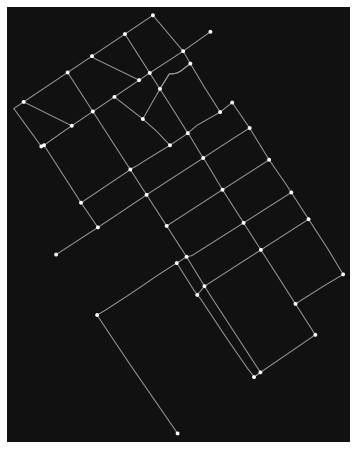

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [10]:
H = graph.subgraph(u + v)
ox.plot.plot_graph(H)

In [12]:
edge_list = df[df.type.isin(["Car","Taxi"])][['edge_id']].reset_index()[['edge_id','id']].drop_duplicates().groupby(['edge_id']).count().reset_index()
edge_list

,edge_id,id
0,250691795_250692406,5
1,250691795_250699359,2402
2,250692406_300400248,752
3,250698924_250698926,112
4,250698926_250699612,1092
5,250699359_250699613,1746
6,250699359_250709162,1346
7,250699359_8446047162,1341
8,250699362_250699984,2182
9,250699362_250700083,1609


In [15]:
df_2 = df[df.edge_id.isin(edge_list[edge_list.id >= 200]['edge_id'])]
def length(start_node,end_node):
    
    try:
        val = graph[start_node][end_node][0]["length"]
    except KeyError:
        val = graph[end_node][start_node][0]["length"]
    return val

df_nodes = df_2.reset_index()[['nearest_edge_start_node','nearest_edge_end_node','edge_id']].drop_duplicates()
df_nodes['len'] = df_nodes.apply(lambda x: length(x[0],x[1]),axis = 1)
edges_to_select = df_nodes[df_nodes.len >=65].edge_id.unique()
df_2 = df_2[df_2.edge_id.isin(edges_to_select)]
df_2.head()

In [16]:
df_2.head()

lat        lon    speed  lon_acc  lat_acc type  avg_speed  \
id    time                                                                    
1_1_1 4.48  37.981525  23.734275  16.6279  -1.4742   0.1357  Bus   5.227568   
      4.52  37.981526  23.734277  16.4127  -1.5150   0.1449  Bus   5.227568   
      4.56  37.981527  23.734278  16.1913  -1.5597   0.1543  Bus   5.227568   
      4.60  37.981527  23.734280  15.9632  -1.6082   0.1638  Bus   5.227568   
      4.64  37.981528  23.734282  15.7285  -1.6516   0.1736  Bus   5.227568   

             bearing  edge_progress  dir  edge_progress_intervals  \
id    time                                                          
1_1_1 4.48  0.330390       1.007785    0                      1.0   
      4.52  0.169830       1.007733    1                      1.0   
      4.56  1.570795       1.007974    0                      1.0   
      4.60  0.330399       1.007390    0                      1.0   
      4.64  0.169834       1.007341    1                      1.0   

            vehicle_density  avg_surr_speed  xtrack_dist  \
id    time                                                 
1_1_1 4.48                1         16.6279    -5.153277   
      4.52                1         16.4127    -4.945704   
      4.56                1         16.1913    -4.811658   
      4.60                1         15.9632    -4.664605   
      4.64                1         15.7285    -4.457032   

            nearest_edge_start_node  nearest_edge_end_node  \
id    time                                                   
1_1_1 4.48                250691795              250699359   
      4.52                250691795              250699359   
      4.56                250691795              250699359   
      4.60                250691795              250699359   
      4.64                250691795              250699359   

                        edge_id  
id    time                       
1_1_1 4.48  250691795_250699359  
      4.52  250691795_250699359  
      4.56  250691795_250699359  
      4.60  250691795_250699359  
      4.64  250691795_250699359

In [17]:
edge_list = df_2.reset_index()[['edge_id','nearest_edge_start_node','nearest_edge_end_node','id']].drop_duplicates().groupby(['edge_id','nearest_edge_start_node','nearest_edge_end_node']).count().reset_index()
edge_list

,edge_id,nearest_edge_start_node,nearest_edge_end_node,id
0,250691795_250699359,250691795,250699359,3688
1,250698926_250699612,250698926,250699612,1768
2,250699359_8446047162,250699359,8446047162,1985
3,250699362_250699984,250699362,250699984,3402
4,250699362_250708641,250699362,250708641,3114
5,250699613_250699614,250699613,250699614,3340
6,250699614_250699615,250699614,250699615,1446
7,250699614_250699711,250699614,250699711,1801
8,250699711_250699973,250699711,250699973,680
9,250699711_599116897,250699711,599116897,1556


In [18]:
def data(start_node,end_node):
    
    try:
        print(graph[start_node][end_node][0]["oneway"])
    except KeyError:
        print(graph[end_node][start_node][0]["oneway"])
        
edge_list.apply(lambda x: data(x[1],x[2]),axis = 1)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
dtype: object

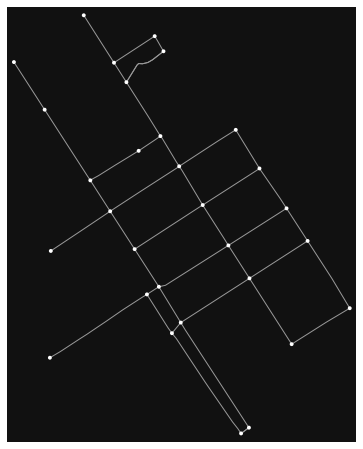

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [19]:
H1 = graph.subgraph(edge_list['nearest_edge_start_node'].to_list() + edge_list["nearest_edge_end_node"].to_list())
ox.plot.plot_graph(H1)